# Exploratory Data Analysis: Movie Revenue over Time

We want to start by getting a sense of how movie revenue has changed over time. As movies became a more popular and mainstream entertainment source both movie budgets and revenue have exploded. Let's take a look. 

### Libraries to import:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")
%matplotlib inline

### Import Data:

We'll start by importing our The Movie DB dataset. 

In [3]:
data = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz') # Import our data.
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Cleaning Data:

#### Changing Release Date to Year: 

We don't need the full date of release for each movie. To keep it simple, lets select just the year.

In [4]:
data['Release_Year'] = pd.DatetimeIndex(data['release_date']).year # The release_date column is formatted in a way
                                                                   # that pandas can recognize so use .year method to
                                                                   # make a new Release_Year column.

#### Recasting Worldwide Gross as an Integer:

Currently our worldwide_gross column in an object 'O' datatype due to the string characters -- dollar signs and commas.

In [5]:
data.worldwide_gross.dtype

dtype('O')

Let's strip the dollar signs and remove commas. Then we can recast the column as a numerical value, 'int64'.

In [6]:
data['worldwide_gross'] = data['worldwide_gross'].str.strip('$')        # Strip dollar signs. 
data['worldwide_gross'] = data['worldwide_gross'].str.replace(',', '')  # Remove commas.
data['worldwide_gross'] = data['worldwide_gross'].astype('int64')       # Recast as numerical data type. 

Type check to confirm our new column data type.

In [7]:
data.worldwide_gross.dtype

dtype('int64')

#### Re-examine our data:

As we can see, our worldwide_gross column is now just numbers and we have a new Release_Year column. 

In [8]:
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747,2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482",240495,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",1338,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,0,2015


### Visualization: 

Now we can start to visualize. We selected a regplot so we can examine the univariate distributions of each variable in addition to the scatter plot between them. We used manually selected y-axis ticks to highlight the exponential growth of worldwide revenue. 

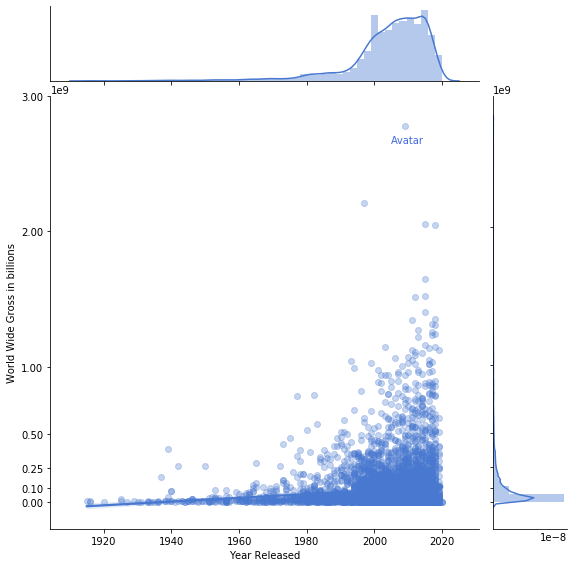

In [16]:
graph = sns.jointplot(x = 'Release_Year', y = 'worldwide_gross', data = data, kind = 'reg', height = 8, scatter_kws={'alpha':0.3})
graph.set_axis_labels('Year Released', 'World Wide Gross in billions') # Set axis labels.
graph.ax_joint.set_yticks([0, 100000000, 250000000, 500000000, 1000000000, 2000000000, 3000000000]) # Set custom ticks.
plt.text(2005,2650000000,'Avatar', color = 'royalblue') # Add text for Avatar.
sns.despine()

Movie revenue has grown exponentially in the last hundred years. The top distribution plot of movies per year also illustrate the growing number of films produced every year. As the revenue has increased, producers are eager to take a slice of the earnings. However, the distribution plot of movies per revenue highlight the fact that the vast majority of films make very little money (~ $100,000,000) compared to blockbusters like Avatar, which earned 2.7 billion. 

### Insights:

There has been a drastic increase in the potential earnings from a feature film, especially in the last twenty years. A handful of films have worldwide earnings of more than 1.5 billion dollars. However, the vast majority of films have earned less than 100 million.